In [1]:
from google.colab import drive
drive.mount('/content/drive')

#dir_pfx = '/content/drive/'
#data_dir = '../data/Vehicules1024/'

dir_pfx = '/content/drive/Team Drives/ECE285_Project/code/prototype/DenseSRGAN/'
data_dir = dir_pfx + '../data/Vehicules1024/'

# Add the local_modules directory to the set of paths
# Python uses to look for imports.
import sys
sys.path.append(dir_pfx)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip3 install -q git+https://www.github.com/keras-team/keras-contrib.git
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from importlib import reload
import utils
import DenseSRGAN

Using TensorFlow backend.


In [4]:
# Grab a sample image for prediction and reconstruction
num_images = 20
files = utils.scan_dataset(data_dir, num_images) #TODO: 50
training_set, testing_set = utils.create_subsets(files, data_dir, use_validation=False)

#im_hr, im_lr, batch_idx = utils.load_data(0, training_set, data_dir, True, len(training_set))
im_hr, im_lr, batch_idx = utils.load_data(0, training_set, data_dir, True, len(training_set))

The following image is missing!: 00000005
Using 19 images.
Saving files to /content/drive/Team Drives/ECE285_Project/code/prototype/DenseSRGAN/../data/Vehicules1024/


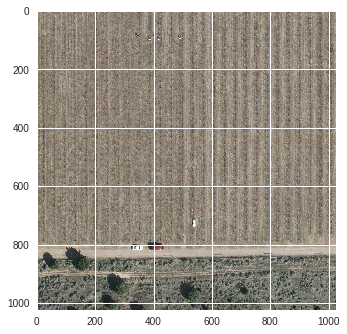

In [6]:
im_hr_patched,im_lr_patched = utils.get_img_patches(im_hr,im_lr,7)

img = utils.restitch_image_patches(im_hr_patched,(1024,1024,4))
plt.figure()
plt.imshow(img[:,:,0:3])
plt.show()

In [0]:
gan = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr,im_lr,proj_pfx="OH",weights_path=dir_pfx + 'weights/OH/predict/')

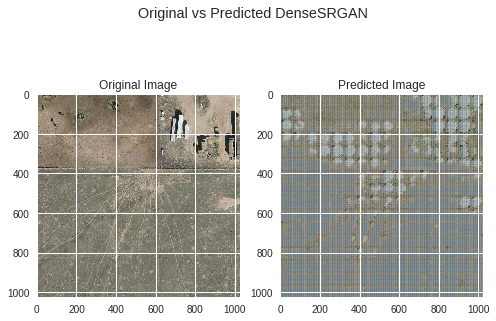

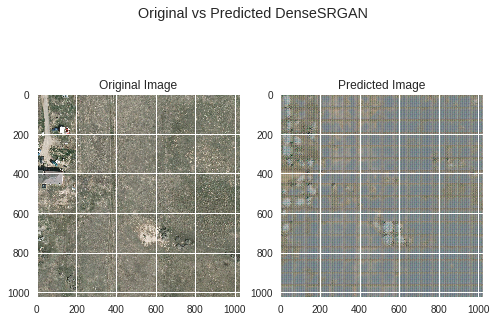

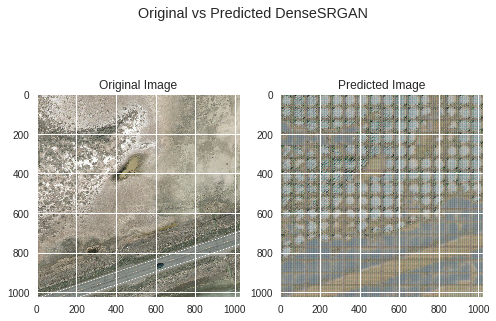

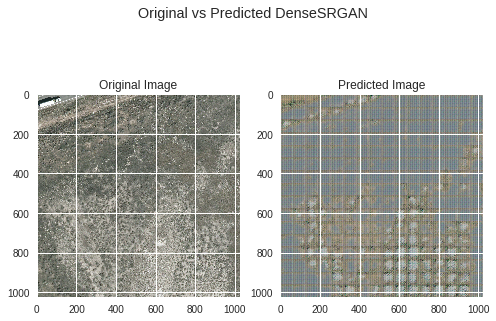

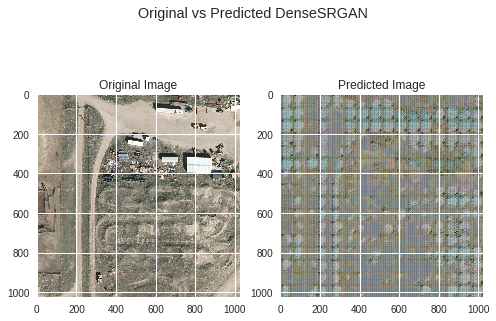

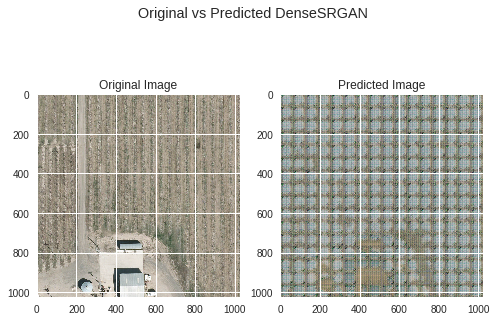

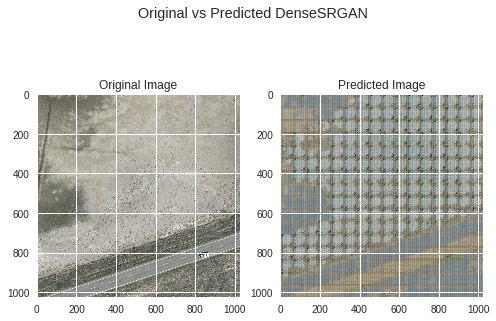

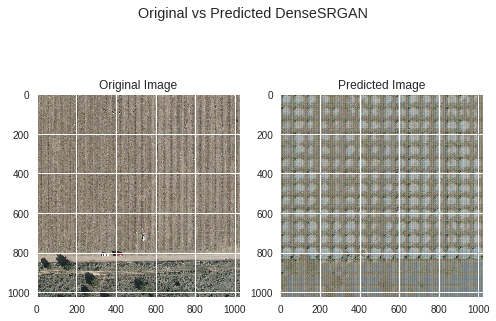

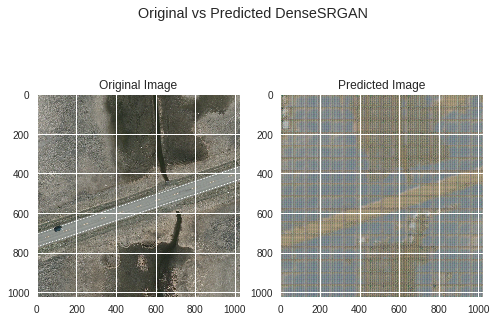

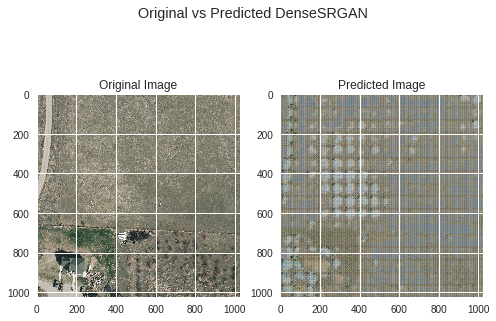

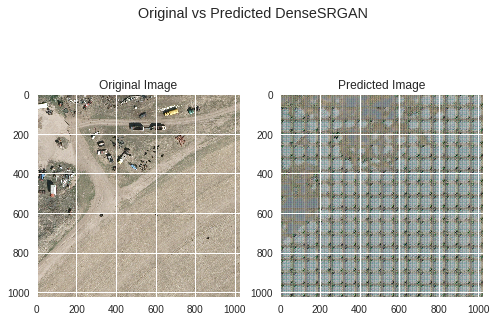

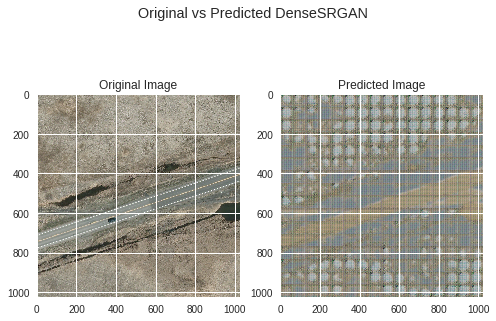

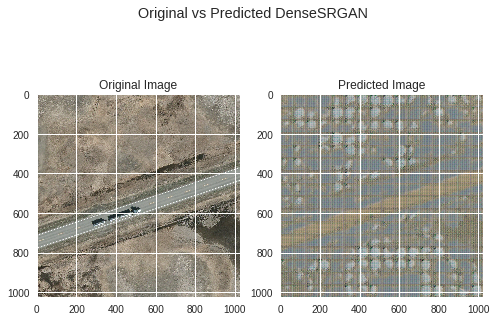

In [14]:
for i in range(len(training_set)):

  im_hr_patched,im_lr_patched = utils.get_img_patches(im_hr,im_lr,i)


  pred_patches = gan.gen.predict(im_lr_patched)

  pred_img_stiched = utils.restitch_image_patches(pred_patches,(1024,1024,4))
  orig_img_stitched = utils.restitch_image_patches(im_hr_patched,(1024,1024,4))


  plt.figure().suptitle('Original vs Predicted DenseSRGAN')
  plt.subplot(1,2,1)
  plt.imshow(orig_img_stitched[:,:,0:3])
  plt.title('Original Image')
  plt.subplot(1,2,2)
  plt.imshow(pred_img_stiched[:,:,0:3])
  plt.title('Predicted Image')
  plt.savefig('{0}{1}bench_epoch_{2}'.format(dir_pfx,'figures/',i))


In [0]:
gan2 = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr,im_lr,proj_pfx="OH",weights_path=dir_pfx + 'weights/OH/1100/')

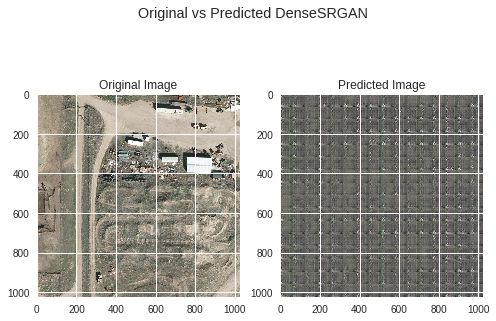

In [24]:
im_hr_patched,im_lr_patched = utils.get_img_patches(im_hr,im_lr,4)

pred_patches = gan2.gen.predict(im_lr_patched)

pred_img_stiched = utils.restitch_image_patches(pred_patches,(1024,1024,4))
orig_img_stitched = utils.restitch_image_patches(im_hr_patched,(1024,1024,4))


plt.figure().suptitle('Original vs Predicted DenseSRGAN')
plt.subplot(1,2,1)
plt.imshow(orig_img_stitched[:,:,0:3])
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(pred_img_stiched[:,:,0:3])
plt.title('Predicted Image')
plt.show()

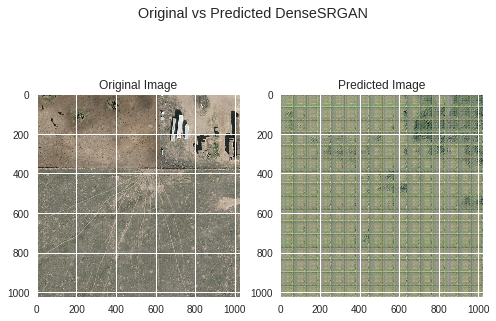

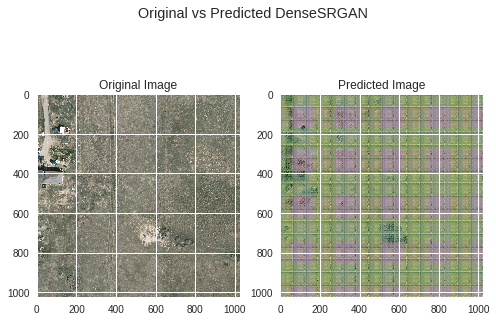

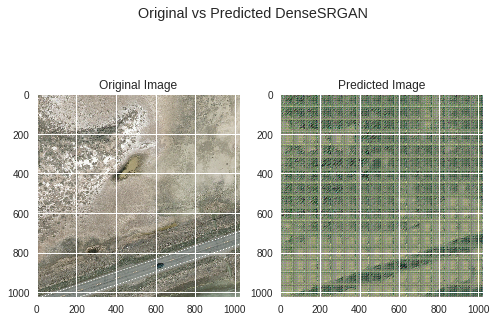

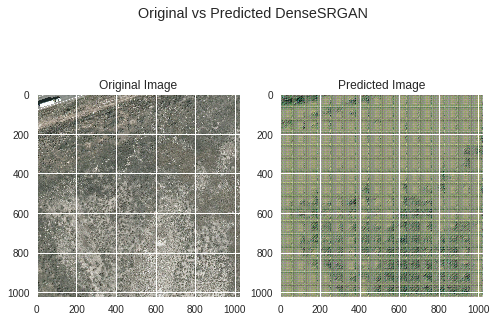

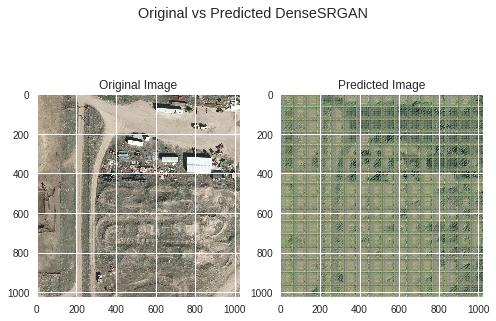

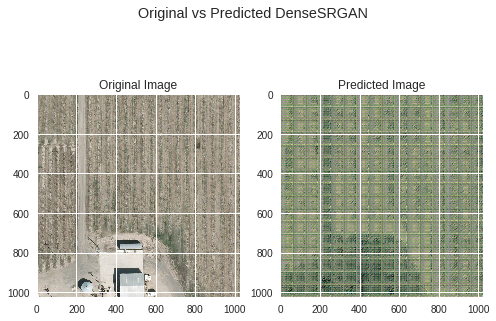

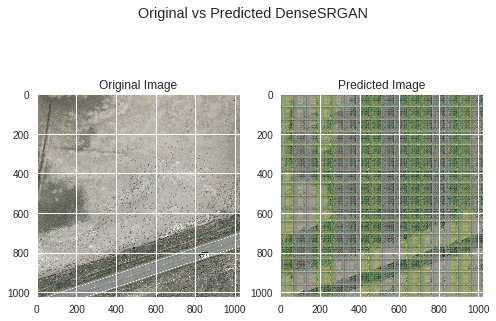

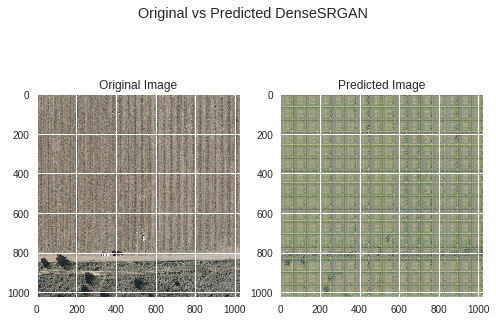

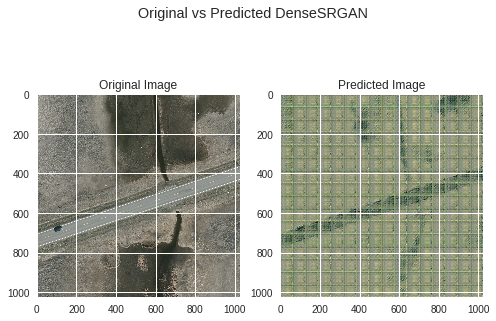

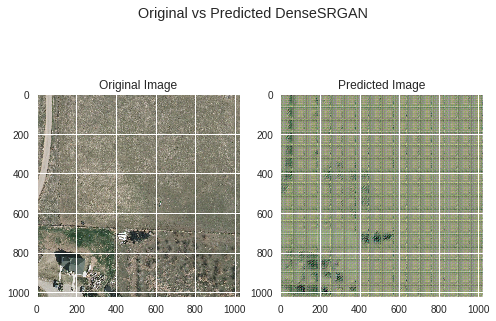

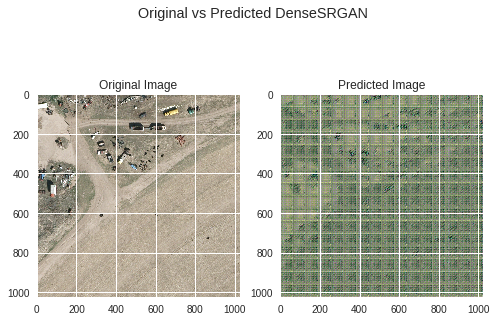

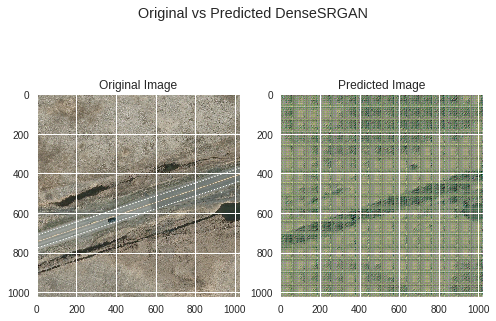

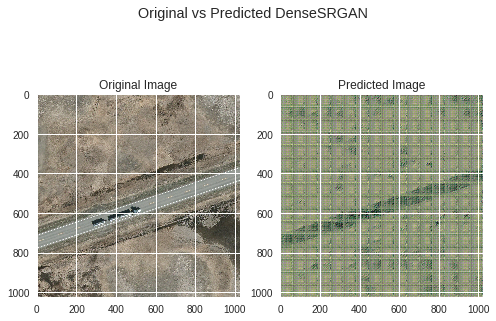

In [17]:
for i in range(len(training_set)):

  im_hr_patched,im_lr_patched = utils.get_img_patches(im_hr,im_lr,i)


  pred_patches = gan2.gen.predict(im_lr_patched)

  pred_img_stiched = utils.restitch_image_patches(pred_patches,(1024,1024,4))
  orig_img_stitched = utils.restitch_image_patches(im_hr_patched,(1024,1024,4))


  plt.figure().suptitle('Original vs Predicted DenseSRGAN')
  plt.subplot(1,2,1)
  plt.imshow(orig_img_stitched[:,:,0:3])
  plt.title('Original Image')
  plt.subplot(1,2,2)
  plt.imshow(pred_img_stiched[:,:,0:3])
  plt.title('Predicted Image')
  plt.savefig('{0}{1}pred_epoch_930_sample_{2}'.format(dir_pfx,'figures/',i))

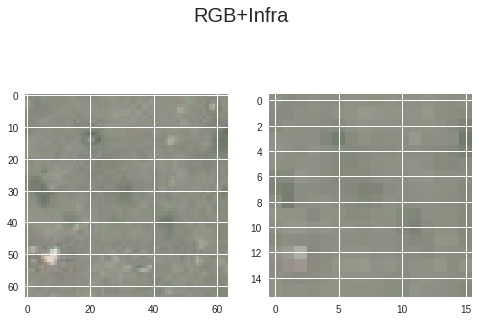

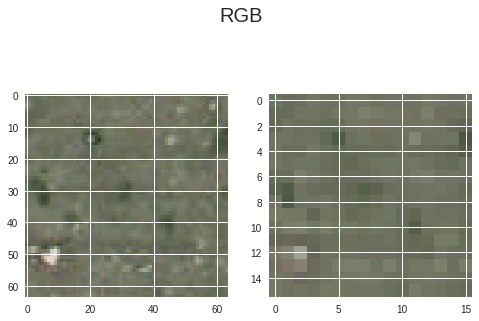

In [6]:

ix = 767
normalized_around_zero = False

if normalized_around_zero:
    plt.figure().suptitle('RGB+Infra', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(utils.un_normalize(im_hr[ix,:,:,:]))
    plt.subplot(1,2,2)
    plt.imshow(utils.un_normalize(im_lr[ix,:,:,:]))

    plt.figure().suptitle('RGB', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(utils.un_normalize(im_hr[ix,:,:,0:3]))
    plt.subplot(1,2,2)
    plt.imshow(utils.un_normalize(im_lr[ix,:,:,0:3]))
else:
    plt.figure().suptitle('RGB+Infra', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(im_hr[ix,:,:,0:3])
    plt.subplot(1,2,2)
    plt.imshow(im_lr[ix,:,:,:])

    plt.figure().suptitle('RGB', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(im_hr[ix,:,:,0:3])
    plt.subplot(1,2,2)
    plt.imshow(im_lr[ix,:,:,0:3])